In [2]:
%matplotlib notebook
# https://stackoverflow.com/questions/43599018/is-there-a-way-to-get-matplotlib-path-contains-points-to-be-inclusive-of-boundar
#I do quite like this command in Jupiter notebook:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
#It makes things wider and not waste the space on your screen
import pandas as pd
import importlib
import csv,os
import numpy as np
import pandas as pd
import itertools
import pyproj
import shapely
import copy
from uafgi import gicollections,cfutil,glacier,gdalutil,shputil,pdutil
import uafgi.data.ns642
import netCDF4
import matplotlib.pyplot as plt
import uafgi.data.wkt
import uafgi.data.w21 as d_w21
map_wkt = uafgi.data.wkt.nsidc_ps_north
pd.set_option("display.max_rows", 30, "display.max_columns", None)
pd.set_option("display.max_rows", 200, "display.max_columns", None)

In [4]:
import uafgi.data.fj
import uafgi.data.future_termini
importlib.reload(uafgi.data.future_termini)
importlib.reload(pdutil)
uafgi.data.fj.read(map_wkt).df
ft = uafgi.data.future_termini.read(map_wkt)
ftt = pdutil.group_and_tuplelist(ft.df, ['fj_fid'],
    [ ('ft_termini', ['ft_terminus']) ])
ftt.columns

Index(['fj_fid', 'fj_poly', 'fj_key'], dtype='object')
Index(['ft_ftid', 'ft_terminus', 'ft_key'], dtype='object')


Index(['fj_fid', 'ft_termini'], dtype='object')

In [5]:
#For now, do this for just 1 glacier
#w21_glacier_id = 199   # Sverdrup

#w21_glacier_id = 58   # Rimfaxe
select = pdutil.ExtDf.read_pickle(uafgi.data.join_outputs('stability/01_select.dfx'))
select.df.columns
select.df = pdutil.merge_nodups(select.df, ftt, on='fj_fid', how='left')
select.df.columns

Index(['w21t_Glacier', 'w21t_date_termini', 'w21t_glacier_number', 'w21t_tloc',
       'w21_popular_name', 'w21_greenlandic_name', 'w21_coast', 'w21_category',
       'w21_Qr', 'w21_Qf', 'w21_Qm', 'w21_Qs', 'w21_Qc_inferred', 'w21_qm',
       'w21_qf', 'w21_qc', 'w21_mean_depth', 'w21_min_depth',
       'w21_quality_str', 'w21_area_grounded_1992_2017',
       'w21_area_grounded_1992_1997', 'w21_area_grounded_1998_2007',
       'w21_area_grounded_2008_2017', 'w21_mean_fjord_width',
       'w21_length_grounded_1992_2017', 'w21_length_grounded_1992_1997',
       'w21_length_grounded_1998_2007', 'w21_length_grounded_2008_2017',
       'w21_ocean_model_sample_area', 'w21_mean_TF_1992-2017',
       'w21_mean_TF_1992-1997', 'w21_mean_TF_1998-2007',
       'w21_mean_TF_2008-2017', 'w21_subglacial_discharge_1992_2017',
       'w21_subglacial_discharge_1992_1997',
       'w21_subglacial_discharge_1998_2007',
       'w21_subglacial_discharge_2008_2017', 'w21_mean_xsection_area',
       'w21_mean_

In [4]:
select.df[['w21t_glacier_number','w21t_Glacier','ns481_grid','ft_termini']]

,w21t_glacier_number,w21t_Glacier,ns481_grid,ft_termini
0,62,AP Bernstorff,E63.85N,[(LINESTRING (167460.6395044228 -2875820.97230...
1,142,Academy,E81.45N,[(LINESTRING (203367.4321498066 -883396.621496...
2,21,Akullersuup,W64.25N,[(LINESTRING (-227861.8481929932 -2813082.0000...
3,220,Akullikassaap,W72.90N,[(LINESTRING (-317337.0186704031 -1823862.8754...
4,221,Akullikassaap E,W72.90N,[(LINESTRING (-311692.9932662242 -1828085.0938...
5,219,Akullikassaap W,W72.90N,[(LINESTRING (-322115.1856423049 -1818742.8534...
6,18,Alangorliup,W69.10N,[(LINESTRING (-210978.485674423 -2296241.58339...
7,210,Alison,W74.50N,NaN
8,43,Anorituup Kangerlua N,E61.70N,[(LINESTRING (106033.8780676517 -3134049.48011...
9,82,Apuseerajik,E66.50N,[(LINESTRING (340101.8432377214 -2571136.81105...


In [136]:
import datetime
import scipy.interpolate
from uafgi import dtutil
from uafgi.pism import flow_simulation

for ix,selrow in select.df.iterrows():
#    if selrow.ns481_grid != 'E66.50N':
#        continue

    if selrow.w21t_Glacier != 'Hayes SS':
        continue
    print('=== Termini for glacier: {} {}'.format(selrow.ns481_grid, selrow.w21t_Glacier))


    tpl = uafgi.data.join_outputs('wood2021', 'velocities', 'vel_{}_2011_2020').format(selrow.ns481_grid)
    velocity_file = tpl+'.nc'
    sigma_file = tpl+'_sigma.nc'
    bedmachine_file = uafgi.data.join_outputs('bedmachine', 'BedMachineGreenland-2017-09-20_{}.nc'.format(selrow.ns481_grid))
    

    data = list()

    print(selrow[['w21t_date_termini', 'ft_termini']])
    
    # Compute for past termini
    
    date_termini = sorted(selrow.w21t_date_termini)
    itime = 0

    termini = [terminus for _,terminus in date_termini]
    frs = flow_simulation.flow_rate3(selrow['ns481_grid'],
        bedmachine_file, selrow['fj_poly'],
        velocity_file,sigma_file,itime, termini,
        selrow['up_loc'])

    for (date,terminus),fr in zip(date_termini,frs):
        data.append((None, dtutil.year_fraction(date),terminus,fr.aflux,fr.sflux,fr.up_area))

    # Compute for future termini
    termini = [x[0] for x in selrow.ft_termini]
    print('xxxxxxx ', termini[0])
    frs = flow_simulation.flow_rate3(selrow['ns481_grid'],
        bedmachine_file, selrow['fj_poly'],
        velocity_file,sigma_file,itime, termini,
        selrow['up_loc'])
    frs.sort(key=lambda x: -x.up_area)

    for ix,(terminus,fr) in enumerate(zip(termini,frs)):
        data.append((ix,2020+ix,terminus,fr.aflux,fr.sflux,fr.up_area))

    #    print(date, fr.sflux/fr.aflux, fr)
    fluxdf = pd.DataFrame(data, columns=('future_index', 'year','terminus','aflux','sflux','up_area'))
    fluxdf['fluxratio'] = fluxdf.sflux/fluxdf.aflux

    break
fluxdf    
    

=== Termini for glacier: W74.95N Hayes SS
w21t_date_termini    [(1987-09-17 00:00:00, LINESTRING (-338310.155...
ft_termini           [(LINESTRING (-326926.0490189445 -1626297.5618...
Name: 37, dtype: object
xxxxxxx  LINESTRING (-326926.0490189445 -1626297.561897036, -325710.6254983652 -1632228.828677463, -328724.8758294024 -1637673.926049659)


,future_index,year,terminus,aflux,sflux,up_area,fluxratio
0,NaN,1985.405365,LINESTRING (-338393.732513867 -1635608.9574369...,0.266556,133015.494340,126340000.0,499015.785955
1,NaN,1985.673858,LINESTRING (-338329.600678504 -1635592.2808495...,0.266556,133015.494340,122800000.0,499015.785955
2,NaN,1986.282192,LINESTRING (-338321.512433284 -1635563.7031929...,0.266556,133015.494340,121820000.0,499015.785955
3,NaN,1986.682078,LINESTRING (-338319.818630574 -1635584.2596906...,0.266556,133015.494340,121000000.0,499015.785955
4,NaN,1987.290297,LINESTRING (-338331.294478137 -1635571.7243472...,0.266556,133015.494340,120830000.0,499015.785955
5,NaN,1987.709475,LINESTRING (-338310.155949981 -1635586.3115915...,0.266556,133015.494340,119460000.0,499015.785955
6,NaN,1988.234973,LINESTRING (-338353.757382394 -1635587.1510832...,0.266556,133015.494340,117340000.0,499015.785955
7,NaN,1988.740323,LINESTRING (-338369.945185803 -1635563.5167135...,0.266556,133015.494340,115500000.0,499015.785955
8,NaN,1989.284817,LINESTRING (-333069.186674113 -1634729.8330700...,0.266556,133015.494340,109800000.0,499015.785955
9,NaN,1989.742352,LINESTRING (-333063.389178236 -1634731.0635490...,0.266556,133015.494340,108000000.0,499015.785955


In [128]:
#55fluxdf = fluxdf[fluxdf['year'] >= 2010]
fluxdf

,future_index,year,terminus,aflux,sflux,up_area,fluxratio
12,NaN,2013.657420,"LINESTRING (-484943 -1254380, -484902 -1254370...",0.003461,954.496468,99120000.0,275787.639289
13,NaN,2014.528653,"LINESTRING (-484878 -1254390, -484826 -1254380...",0.003647,980.145615,99220000.0,268737.848021
14,NaN,2015.624543,"LINESTRING (-484656 -1254410, -484626 -1254380...",0.004524,1192.372259,97530000.0,263539.222619
15,NaN,2016.620105,"LINESTRING (-484054 -1254550, -483978 -1254540...",0.006758,1880.082617,95190000.0,278198.045451
16,NaN,2017.638242,"LINESTRING (-483760 -1254670, -483719 -1254660...",0.006193,1555.623203,94590000.0,251200.908075
17,NaN,2019.210845,"LINESTRING (-482076 -1254960, -482076 -1254910...",0.008007,1965.844825,91650000.0,245501.500317
18,0.0,2020.000000,LINESTRING (-480270.6241834443 -1250550.352026...,0.001244,272.335967,89070000.0,218979.920058
19,1.0,2021.000000,LINESTRING (-479440.9360934773 -1251089.649285...,0.001153,250.112122,85160000.0,216846.247883
20,2.0,2022.000000,LINESTRING (-478611.2480035087 -1251545.977734...,0.001129,254.710295,81210000.0,225535.899631
21,3.0,2023.000000,LINESTRING (-477698.5911045441 -1252002.306184...,0.001038,215.900174,77360000.0,207971.484057


<IPython.core.display.Javascript object>


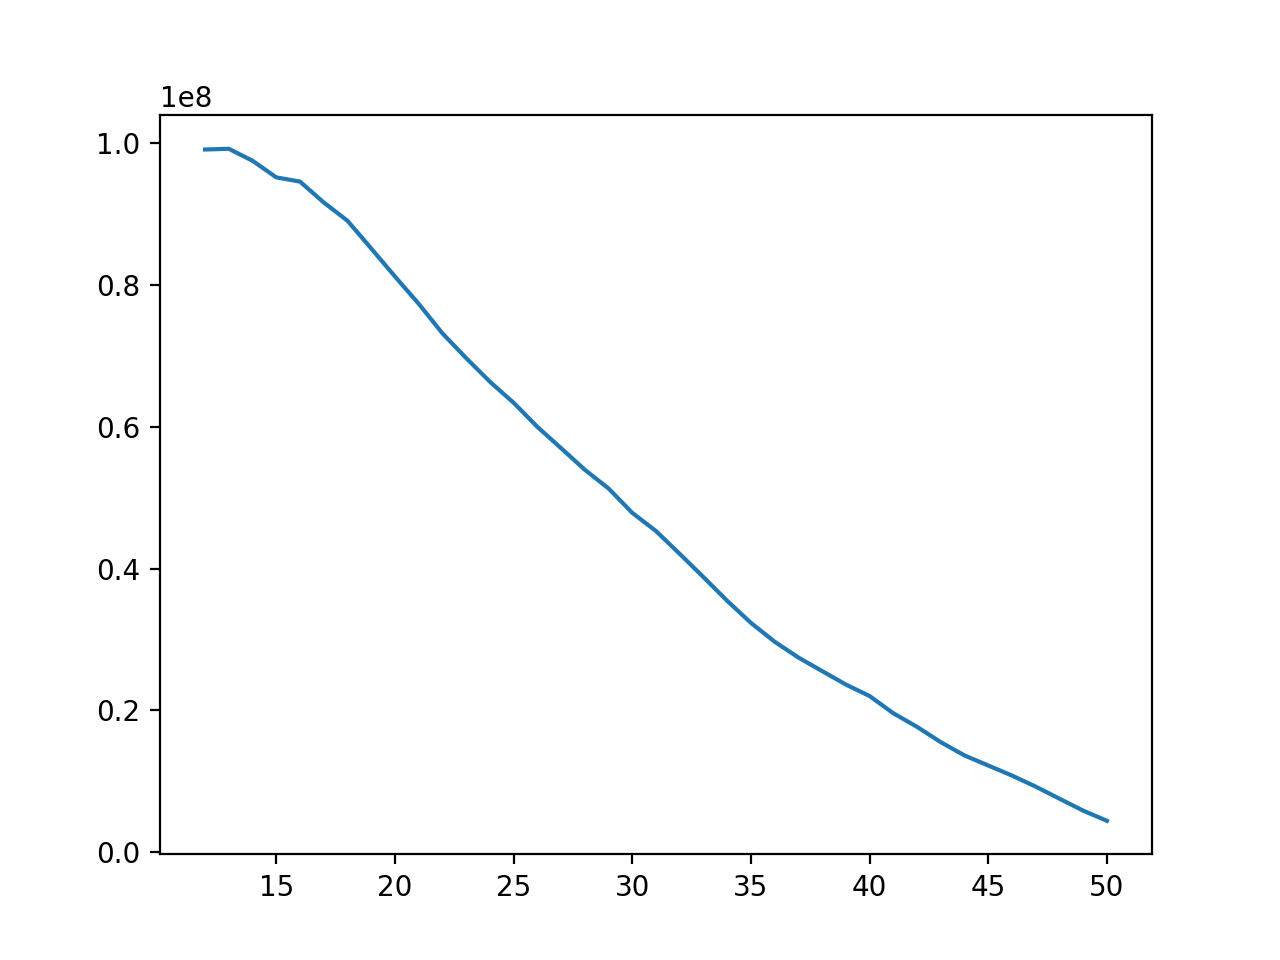

In [131]:
fluxdf['up_area'].plot()

<IPython.core.display.Javascript object>


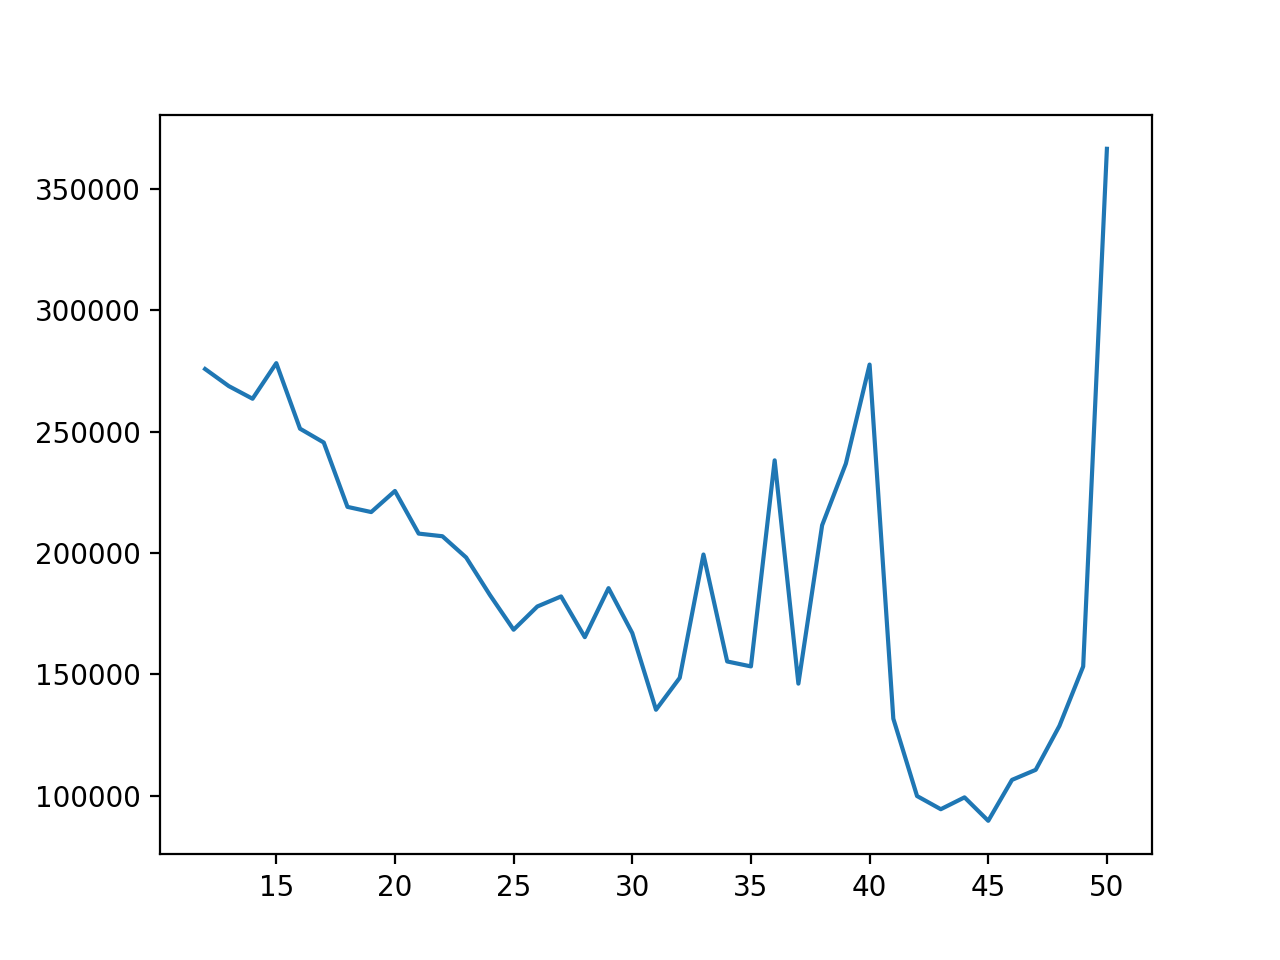

In [132]:
fluxdf['fluxratio'].plot()

In [105]:
date_termini = copy.copy(selrow.w21t_date_termini)

rftermini = shputil.read_df('RimfaxeRetreat.shp', wkt=map_wkt, shape0='terminus')
rftermini.df

for ix,row in rftermini.df.iterrows():
    dt = datetime.datetime(2020+ix,1,1)
    date_termini.append((dt,row['loc']))

#rftermini.df['loc']
date_termini

[(Timestamp('2009-07-14 00:00:00'),
  <shapely.geometry.linestring.LineString at 0x1277b3750>),
 (Timestamp('2003-08-15 00:00:00'),
  <shapely.geometry.linestring.LineString at 0x1277b3790>),
 (Timestamp('2004-08-01 00:00:00'),
  <shapely.geometry.linestring.LineString at 0x1277b37d0>),
 (Timestamp('2014-08-21 00:00:00'),
  <shapely.geometry.linestring.LineString at 0x1277b3810>),
 (Timestamp('2010-08-02 00:00:00'),
  <shapely.geometry.linestring.LineString at 0x1277b3850>),
 (Timestamp('2000-07-05 00:00:00'),
  <shapely.geometry.linestring.LineString at 0x1277b3890>),
 (Timestamp('2007-07-25 00:00:00'),
  <shapely.geometry.linestring.LineString at 0x1277b38d0>),
 (Timestamp('2018-08-07 00:00:00'),
  <shapely.geometry.linestring.LineString at 0x1277b3910>),
 (Timestamp('2001-07-08 00:00:00'),
  <shapely.geometry.linestring.LineString at 0x1277b3950>),
 (Timestamp('2006-07-22 00:00:00'),
  <shapely.geometry.linestring.LineString at 0x1277b3990>),
 (Timestamp('1999-09-21 00:00:00'),
  <s

In [106]:
#importlib.reload(cfutil)
# Get velocity times
print('sigma_file ', sigma_file)
with netCDF4.Dataset(velocity_file) as nc:
    ntimes = len(nc.dimensions['time'])
    print('ntimes = {}'.format(ntimes))
    print(nc.variables['time'][:])
    times = cfutil.read_time(nc, 'time')
    time_bndss = cfutil.read_time(nc, 'time_bnds', unitvar='time')

# Get available terminus locations


sigma_file  outputs/wood2021/velocities/vel_E63.35N_2011_2020_sigma.nc
ntimes = 7
[   0.  366.  731. 1096. 1461. 1827. 2192.]


In [107]:
from uafgi.pism import flow_simulation
importlib.reload(flow_simulation)
itime = 0
#termini = [date_termini[0][1]]

date_termini.sort()
termini = [terminus for _,terminus in date_termini]
frs = flow_simulation.flow_rate3(selrow['ns481_grid'],
    bedmachine_file, selrow['fj_poly'],
    velocity_file,sigma_file,itime, termini,
    selrow['up_loc'])

In [115]:
import scipy.interpolate
from uafgi import dtutil
data = list()
for (date,terminus),fr in zip(date_termini,frs):
    data.append((date,terminus,fr.aflux,fr.sflux,fr.up_area))
#    print(date, fr.sflux/fr.aflux, fr)
fluxdf = pd.DataFrame(data, columns=('date','terminus','aflux','sflux','up_area'))
fluxdf['fluxratio'] = fluxdf.sflux/fluxdf.aflux
fluxdf['year'] = fluxdf['date'].map(dtutil.year_fraction)   # [a]

In [116]:
from uafgi import interputil
importlib.reload(interputil)
spl = interputil.spline_ma(fluxdf['year'].to_numpy(), fluxdf['up_area'].to_numpy(), dx_approx=1./12., ma_window=4.)
xs = np.linspace(2009.5,2026,100)
ys = spl.derivative()(xs)
plt.plot(xs,ys)

354 354
ma_npt =  48
307 307


NameError: name 'frs' is not defined

In [117]:
#spl = scipy.interpolate.UnivariateSpline(fluxdf['year'], fluxdf['up_area'],s=0)

                    
plt.plot(xs,spl.derivative()(xs), 'g')
plt.show()

<IPython.core.display.Javascript object>


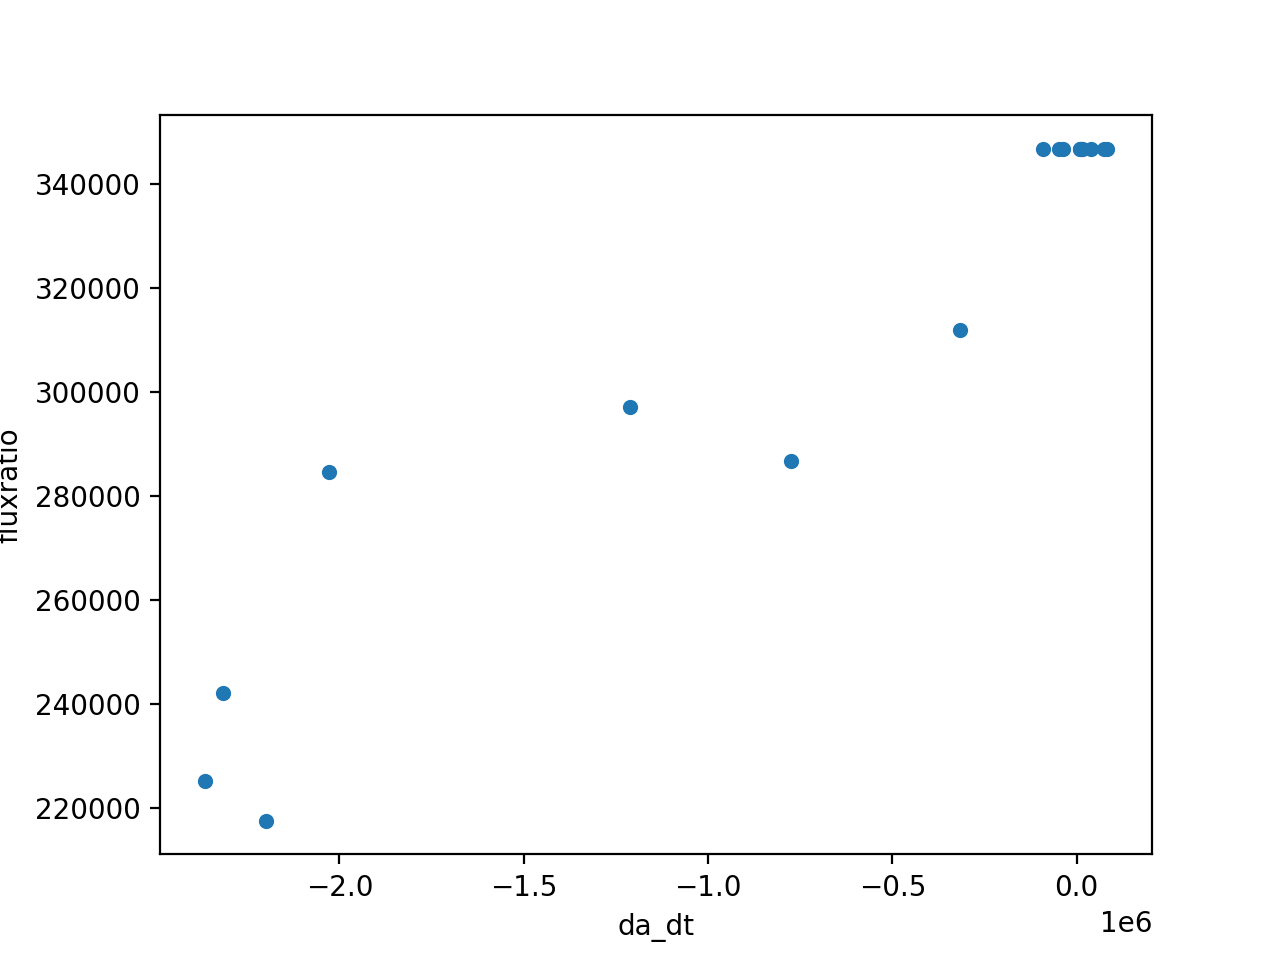

,date,terminus,aflux,sflux,up_area,fluxratio,year,da_dt
11,2009-07-14,"LINESTRING (144506 -2951190, 144529 -2951200, ...",0.172301,59735.816804,71940000.0,346693.901186,2009.531393,9.218372e+03
12,2010-08-02,"LINESTRING (144527 -2951240, 144557 -2951240, ...",0.172301,59735.816804,72020000.0,346693.901186,2010.583447,-4.912435e+04
13,2011-08-05,"LINESTRING (144583 -2951060, 144603 -2951060, ...",0.172301,59735.816804,72380000.0,346693.901186,2011.591667,7.486267e+04
14,2012-08-23,"LINESTRING (144538 -2951020, 144588 -2951030, ...",0.172301,59735.816804,72080000.0,346693.901186,2012.641963,-3.587197e+04
15,2013-08-18,"LINESTRING (144508 -2951180, 144517 -2951160, ...",0.172301,59735.816804,72060000.0,346693.901186,2013.627283,3.811668e+04
16,2014-08-21,"LINESTRING (144527 -2951260, 144540 -2951250, ...",0.172301,59735.816804,72120000.0,346693.901186,2014.635502,1.547897e+04
17,2015-08-24,"LINESTRING (144510 -2951200, 144528 -2951190, ...",0.172301,59735.816804,72010000.0,346693.901186,2015.643721,-9.125605e+04
18,2016-07-25,"LINESTRING (144534 -2951270, 144538 -2951250, ...",0.172301,59735.816804,72150000.0,346693.901186,2016.562728,1.447425e+04
19,2018-08-07,"LINESTRING (144507 -2951210, 144514 -2951190, ...",0.172301,59735.816804,72130000.0,346693.901186,2018.597146,9.901389e+03
20,2019-03-05,"LINESTRING (144465 -2951100, 144486 -2951090, ...",0.172301,59735.816804,72390000.0,346693.901186,2019.172603,8.204360e+04


In [120]:
spld = spl.derivative()

# Select only newer rows since delcine started
fluxdf = fluxdf[fluxdf['year'] >= 2009.5]

#fluxdf['da_dt'] = fluxdf['up_area'].diff() / fluxdf['year'].diff()
fluxdf['da_dt'] = fluxdf['year'].map(spld)
fluxdf.plot.scatter(x='da_dt', y='fluxratio')
fluxdf

<IPython.core.display.Javascript object>


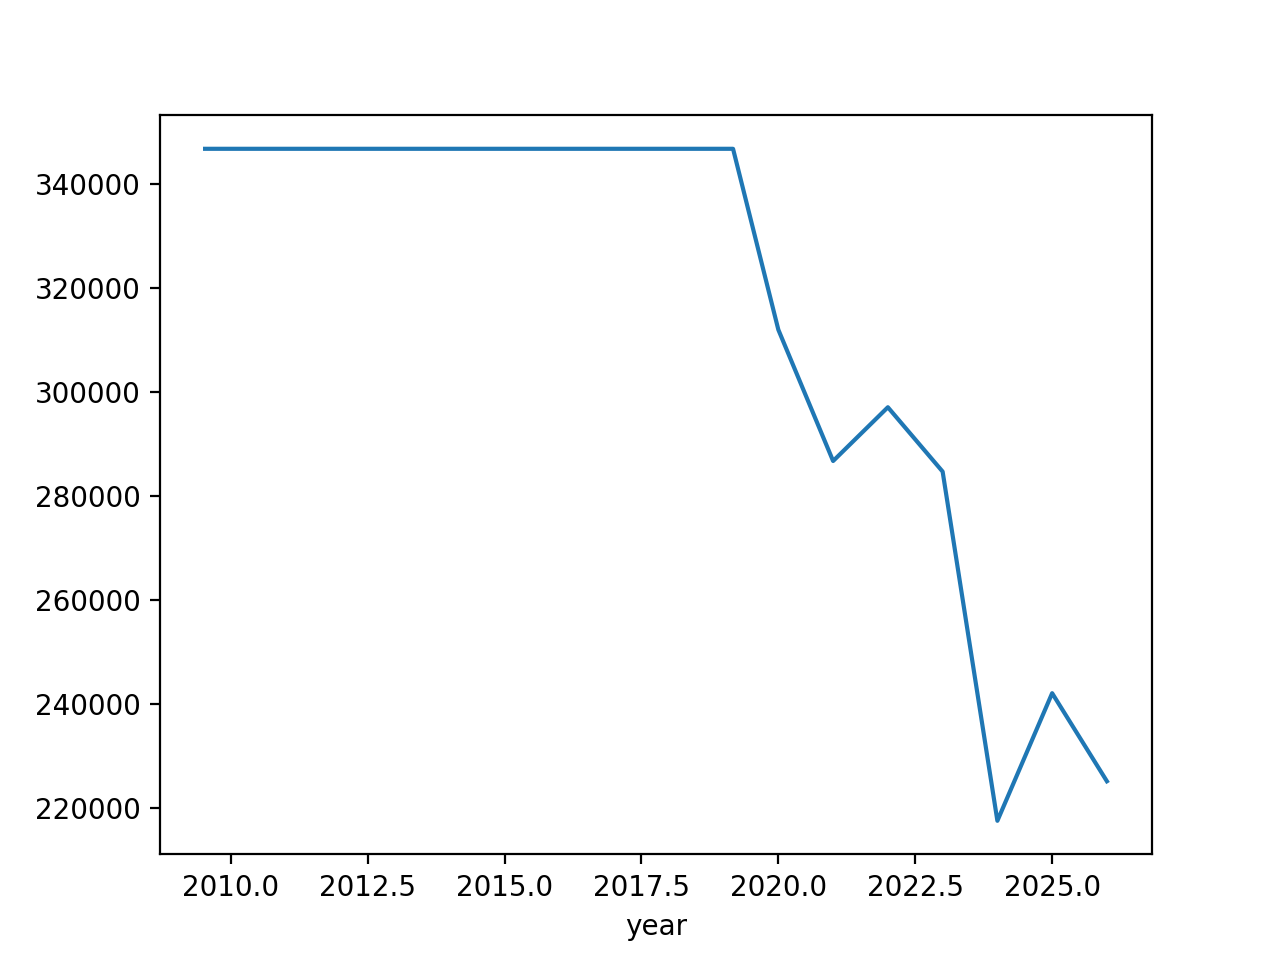

In [121]:
fluxdf.set_index('year')['fluxratio'].plot()
plt.show()

In [10]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
fname = '/Users/eafischer2/velocities/outputs/velterm/velterm_209.df'
pd.read_pickle(fname)

,vel_year,future_index,term_year,terminus,aflux,sflux,ncells,up_area,fluxratio
0,1985.498516,NaN,1985.405365,None,0.003134,753.309877,117,126340000.0,240387.310027
1,1985.498516,NaN,1985.673858,None,0.002220,459.386317,125,122800000.0,206887.389677
2,1985.498516,NaN,1986.282192,None,0.002102,370.554099,125,121820000.0,176303.714780
3,1985.498516,NaN,1986.682078,None,0.001595,252.565748,122,121000000.0,158346.575058
4,1985.498516,NaN,1987.290297,None,0.001627,258.090547,126,120830000.0,158676.314472
5,1985.498516,NaN,1987.709475,None,0.002014,323.856764,136,119460000.0,160819.219528
6,1985.498516,NaN,1988.234973,None,0.002525,387.563071,141,117340000.0,153474.843382
7,1985.498516,NaN,1988.740323,None,0.003477,569.570922,149,115500000.0,163795.436425
8,1985.498516,NaN,1989.284817,None,0.002521,461.422094,73,109800000.0,183004.118482
9,1985.498516,NaN,1989.742352,None,0.002376,383.705020,71,108000000.0,161512.871252


In [23]:
import re

veltermRE = re.compile(r'velterm_(\d\d\d)\.df')
dir = '/Users/eafischer2/velocities/outputs/velterm'
dfs = list()
df = None
for leaf in sorted(os.listdir(dir)):
    match = veltermRE.match(leaf)
    if match is None:
        continue
    glacier_id = int(match.group(1))
    print(leaf, glacier_id)
    fname = os.path.join(dir, leaf)
    df = pd.read_pickle(fname)
    df['glacier_id'] = glacier_id
    dfs.append(df)


velterm_001.df 1
velterm_002.df 2
velterm_003.df 3
velterm_004.df 4
velterm_007.df 7
velterm_008.df 8
velterm_009.df 9
velterm_010.df 10
velterm_011.df 11
velterm_012.df 12
velterm_013.df 13
velterm_014.df 14
velterm_015.df 15
velterm_018.df 18
velterm_019.df 19
velterm_020.df 20
velterm_021.df 21
velterm_022.df 22
velterm_026.df 26
velterm_027.df 27
velterm_037.df 37
velterm_038.df 38
velterm_040.df 40
velterm_041.df 41
velterm_043.df 43
velterm_047.df 47
velterm_048.df 48
velterm_049.df 49
velterm_050.df 50
velterm_053.df 53
velterm_054.df 54
velterm_055.df 55
velterm_056.df 56
velterm_057.df 57
velterm_058.df 58
velterm_059.df 59
velterm_062.df 62
velterm_065.df 65
velterm_066.df 66
velterm_068.df 68
velterm_071.df 71
velterm_072.df 72
velterm_076.df 76
velterm_081.df 81
velterm_082.df 82
velterm_087.df 87
velterm_091.df 91
velterm_092.df 92
velterm_094.df 94
velterm_098.df 98
velterm_103.df 103
velterm_104.df 104
velterm_126.df 126
velterm_128.df 128
velterm_139.df 139
velterm_141.

In [29]:
velterm_df = pd.concat(dfs)

In [64]:
seldf = select.df
seldf[seldf.w21t_Glacier == 'Hayes SS']

,w21t_Glacier,w21t_date_termini,w21t_glacier_number,w21t_tloc,w21_popular_name,w21_greenlandic_name,w21_coast,w21_category,w21_Qr,w21_Qf,w21_Qm,w21_Qs,w21_Qc_inferred,w21_qm,w21_qf,w21_qc,w21_mean_depth,w21_min_depth,w21_quality_str,w21_area_grounded_1992_2017,w21_area_grounded_1992_1997,w21_area_grounded_1998_2007,w21_area_grounded_2008_2017,w21_mean_fjord_width,w21_length_grounded_1992_2017,w21_length_grounded_1992_1997,w21_length_grounded_1998_2007,w21_length_grounded_2008_2017,w21_ocean_model_sample_area,w21_mean_TF_1992-2017,w21_mean_TF_1992-1997,w21_mean_TF_1998-2007,w21_mean_TF_2008-2017,w21_subglacial_discharge_1992_2017,w21_subglacial_discharge_1992_1997,w21_subglacial_discharge_1998_2007,w21_subglacial_discharge_2008_2017,w21_mean_xsection_area,w21_mean_undercutting_1992_2017,w21_mean_undercutting_1992_1997,w21_mean_undercutting_1998_2007,w21_mean_undercutting_2008_2017,w21_mean_undercutting_uncertainty,w21_flux_basin_mouginot_2019,w21_mean_discharge,w21_mean_mass_balance,w21_reference_smb_1961_1990,w21_glacier_number,w21_data_fname,w21_key,w21_allnames,w21_tloc,fj_poly,fj_fid,ns481_key,ns481_grid,ns481_poly,up_key,up_fid,up_id,up_loc,cf20_key,cf20_glacier_id,cf20_greenlandic_name,cf20_official_name,cf20_alt_name,cf20_ref_name,cf20_fname,cf20_uniqename,cf20_locs,cf20_allnames,ns642_key,ns642_GlacierID,ns642_date_termini,ns642_points,ft_termini
37,Hayes SS,"[(1987-09-17 00:00:00, LINESTRING (-338310.155...",209,POINT (-330910.2962960178 -1632023.494606679),Hayes Gl. SS,,NW,DW,6.17,0.96,1.88,0.0,5.25,0.49,0.59,0.1,263.0,147.0,High,27.36,0.87,14.52,11.97,4.44,6.17,0.2,3.27,2.7,NW3,3.12,2.31,3.57,3.06,1.03,0.58,1.06,1.28,1.82,0.69,0.48,0.84,0.65,17.9,HAYES_GLETSCHER_M_SS,2.25,-1.1,1.2,209,Hayes SS Data.nc,"(Hayes Gl. SS, HAYES_GLETSCHER_M_SS)","(Hayes Gl. SS, )",POINT (-330910.2962960178 -1632023.494606679),POLYGON ((-335620.9893275043 -1637668.15063070...,57.0,W74.95N,W74.95N,"POLYGON ((-368150 -1640150, -316050 -1640150, ...",48,48,None,POINT (-320351.3936583198 -1635862.49150273),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,36.0,"[((2000-09-30 00:00:00, 2001-01-23 00:00:00), ...","(POINT (-332622.5089562261 -1630731.32541127),...",[(LINESTRING (-326926.0490189445 -1626297.5618...


In [150]:
# SAMPLE
glacier_df = velterm_df[velterm_df.glacier_id == glacier_id]
#glacier_df.dropna(subset=['future_index'])
glacier_df = glacier_df[glacier_df['future_index'].isna()]
glacier_df

,vel_year,future_index,term_year,terminus,aflux,sflux,ncells,up_area,fluxratio,glacier_id
0,1985.498516,NaN,1985.416324,None,0.418479,165421.513485,60,81550000.0,395292.424978,62
1,1985.498516,NaN,1985.703995,None,0.341475,91575.179655,53,79590000.0,268175.511391,62
2,1985.498516,NaN,1986.336872,None,0.341475,91575.179655,53,84970000.0,268175.511391,62
3,1985.498516,NaN,1986.643721,None,0.338847,89740.298352,51,80220000.0,264840.427045,62
4,1985.498516,NaN,1986.756050,None,0.325122,89622.558054,49,78640000.0,275658.612796,62
...,...,...,...,...,...,...,...,...,...,...
1953,2018.498516,NaN,2015.580708,None,0.308184,54912.777087,61,63850000.0,178181.641458,62
1954,2018.498516,NaN,2016.587318,None,0.308184,54912.777087,61,65230000.0,178181.641458,62
1955,2018.498516,NaN,2017.569749,None,0.307652,53239.419951,61,63900000.0,173050.827144,62
1956,2018.498516,NaN,2018.597146,None,0.347031,49093.885214,62,63370000.0,141468.499848,62


<ipython-input-260-95626cc14a9a>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(14,5))
<ipython-input-260-95626cc14a9a>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(14,5))
<ipython-input-260-95626cc14a9a>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this w

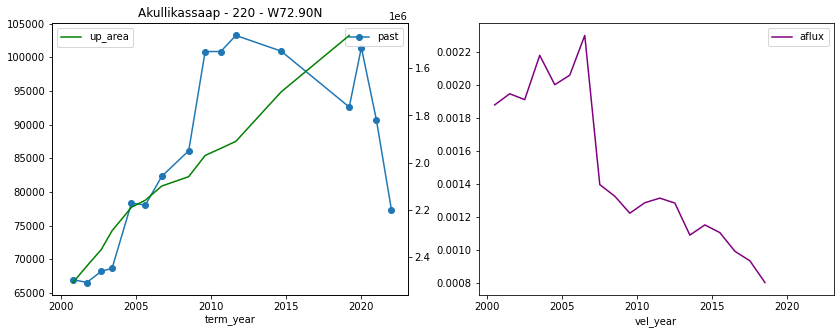

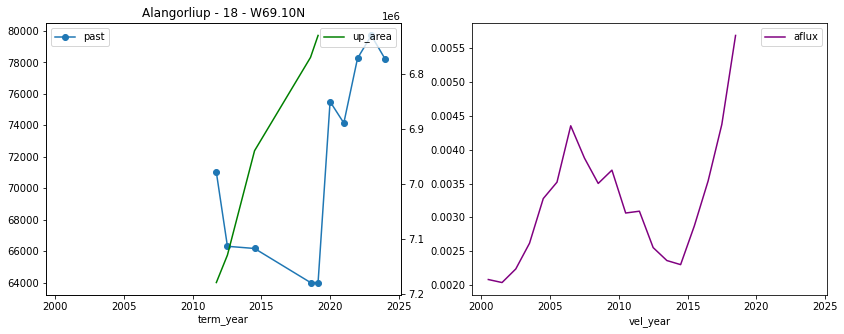

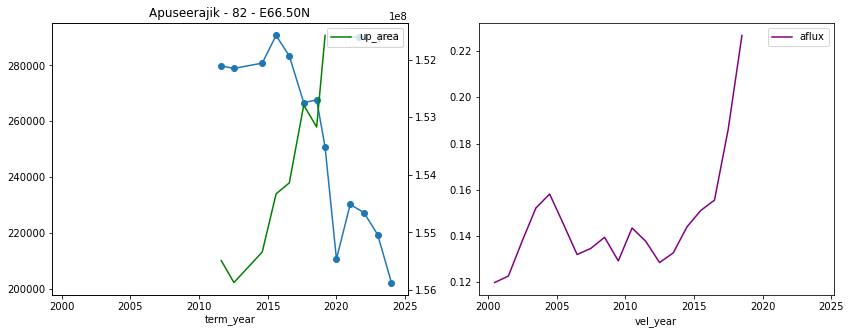

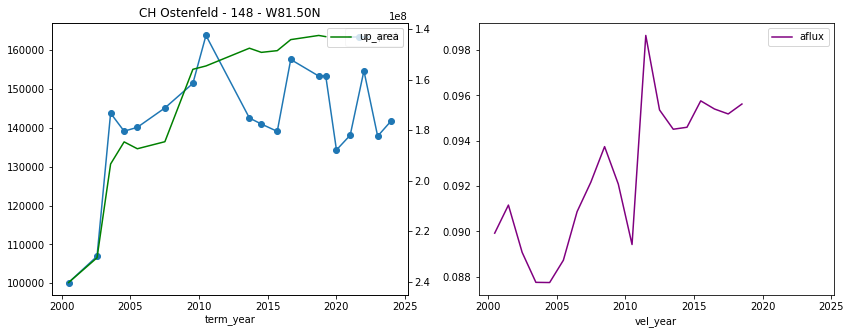

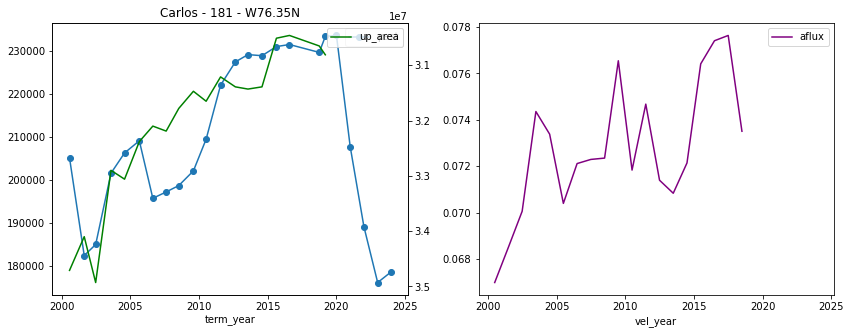

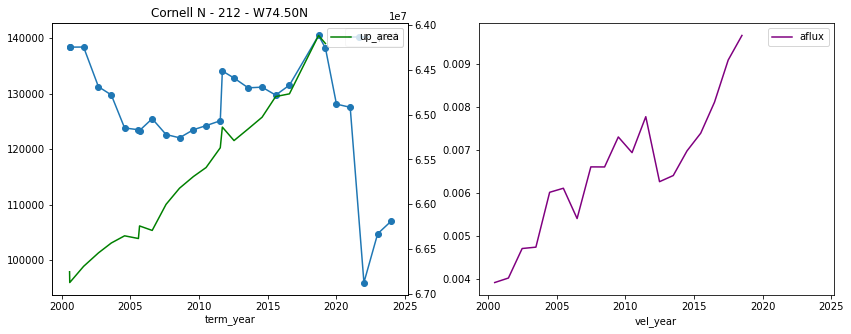

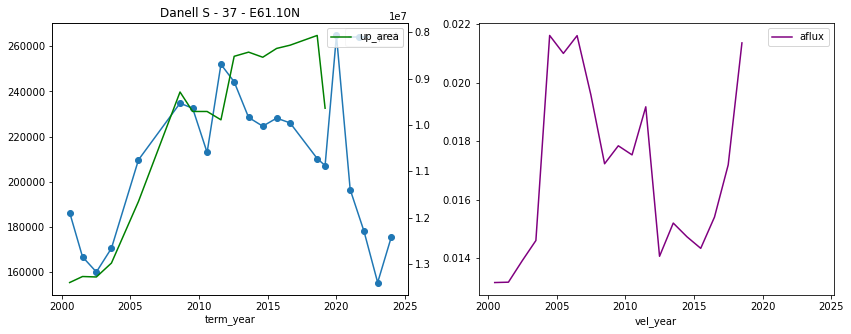

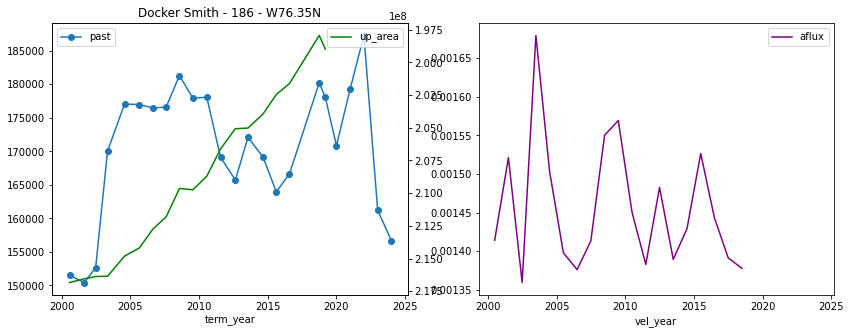

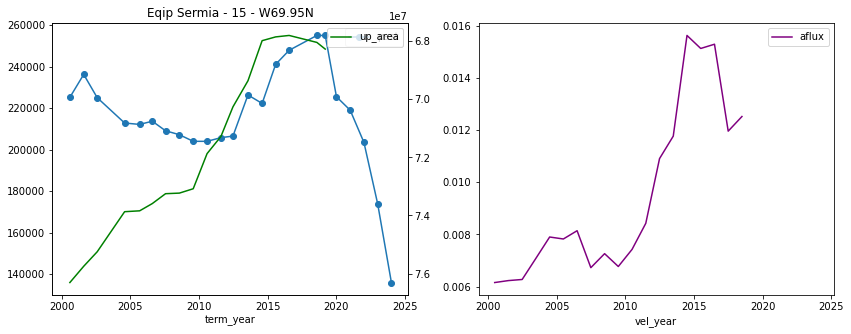

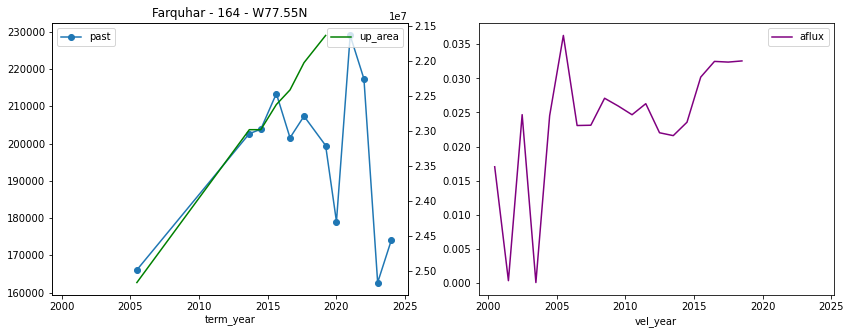

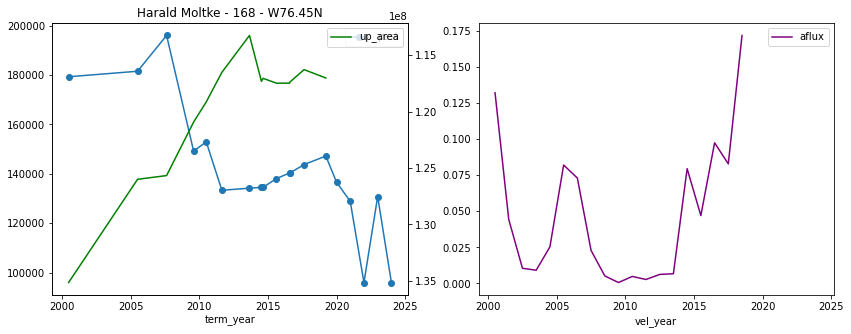

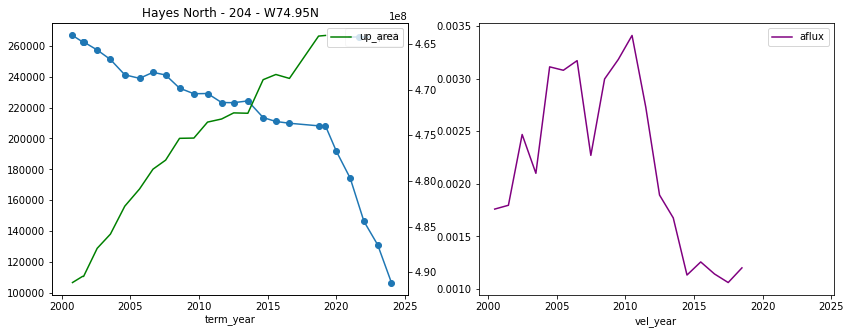

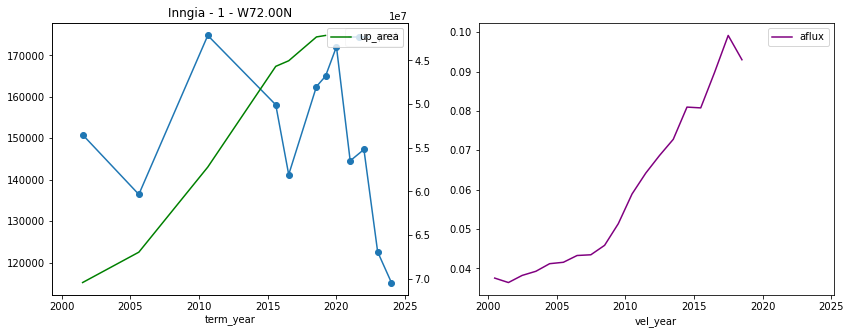

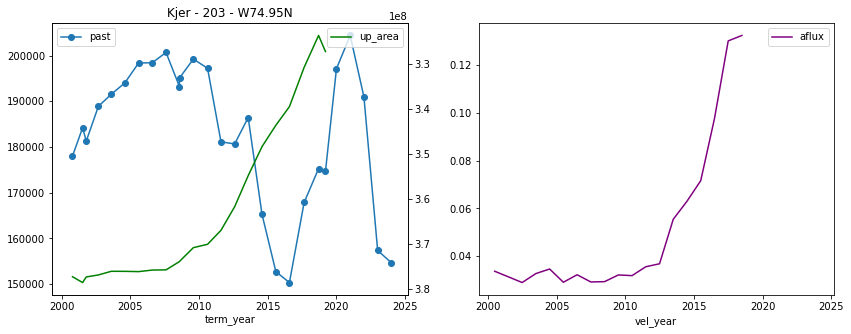

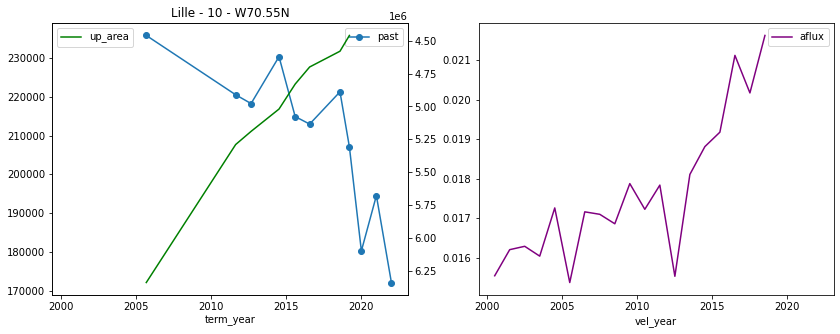

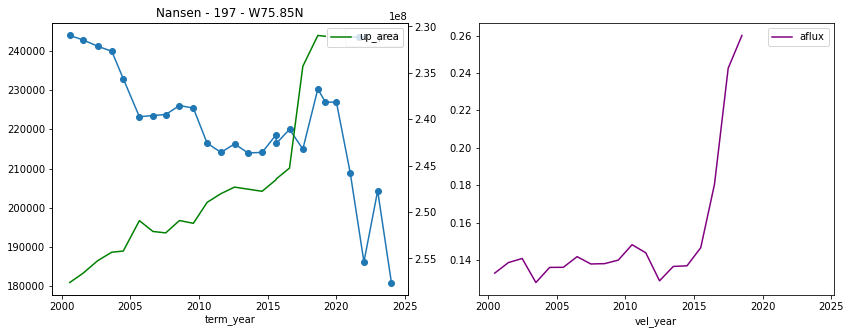

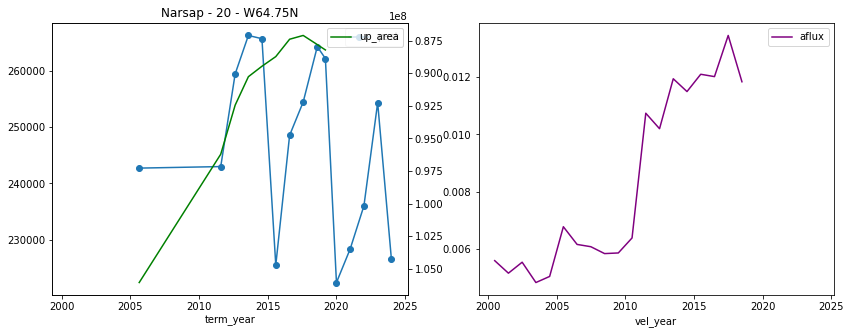

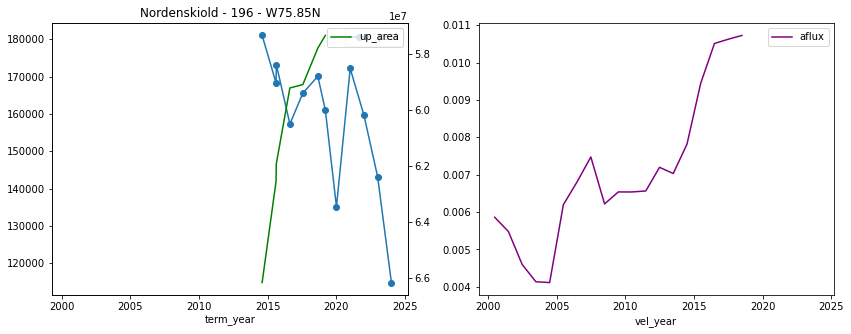

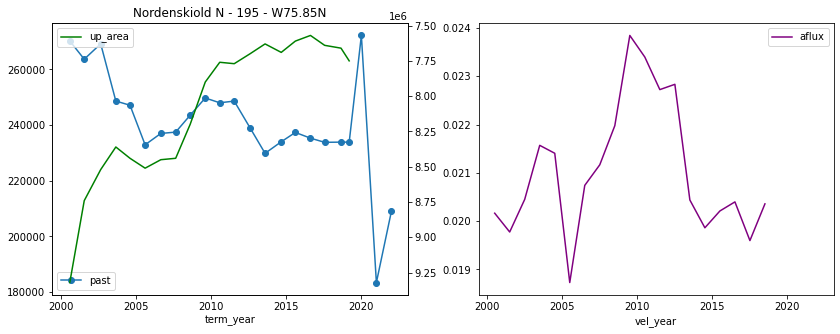

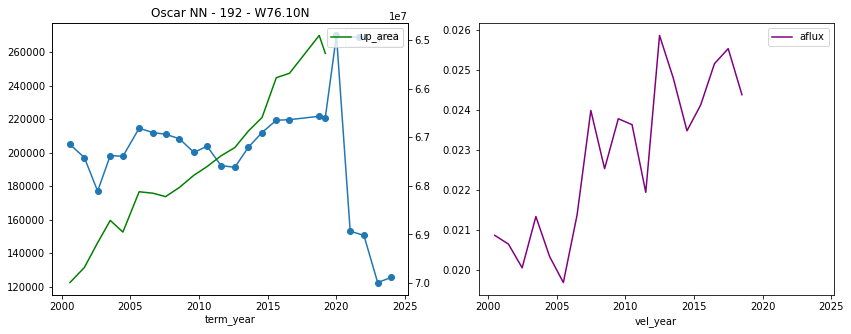

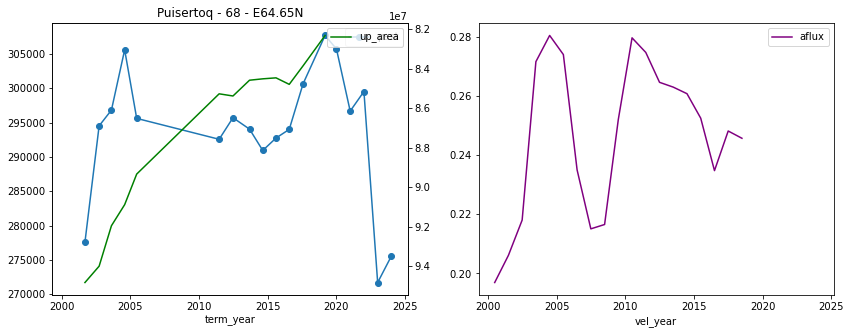

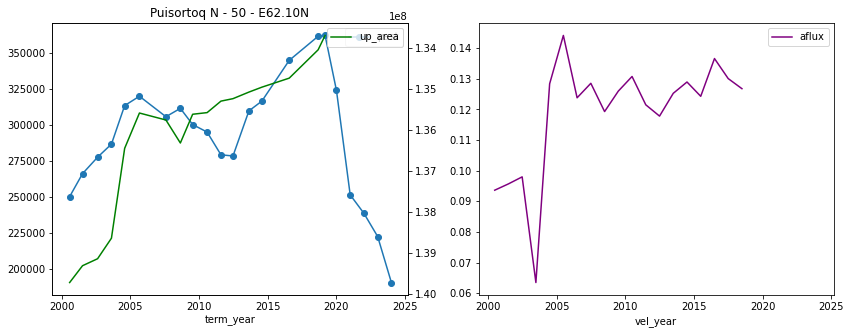

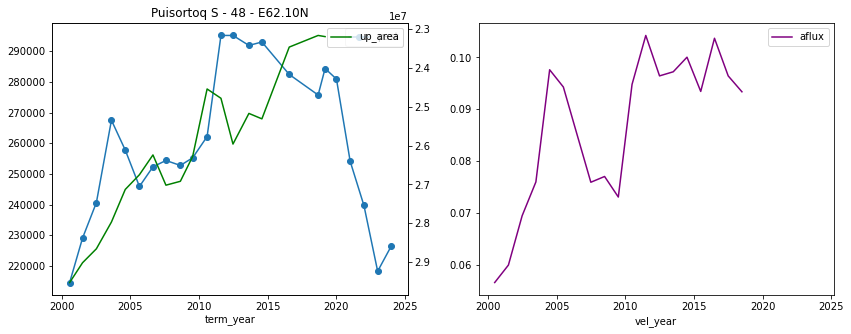

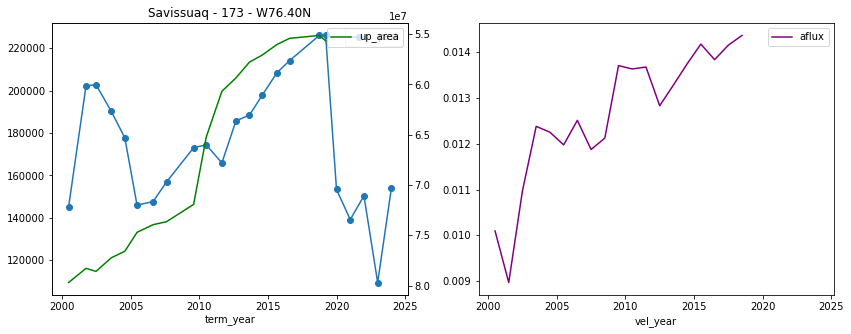

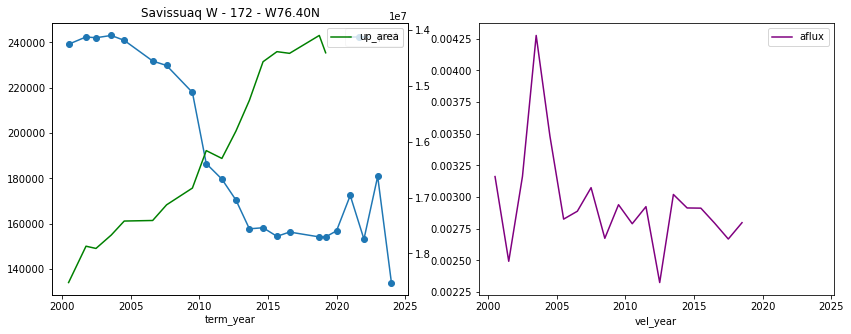

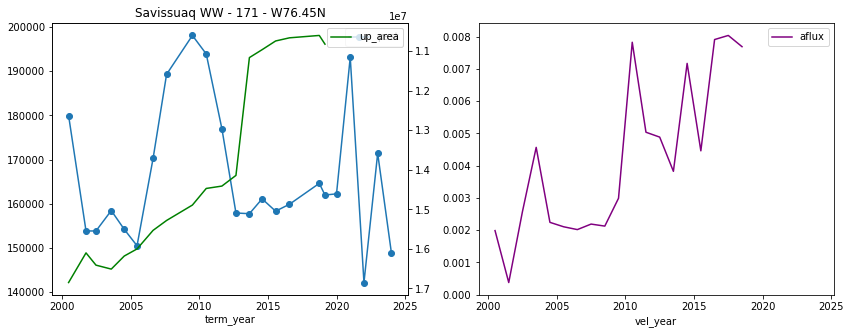

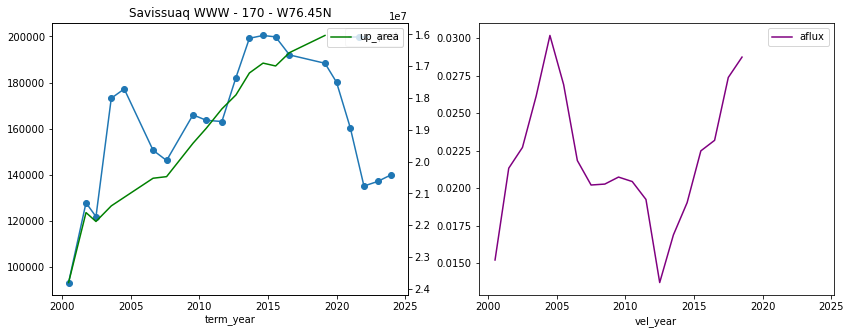

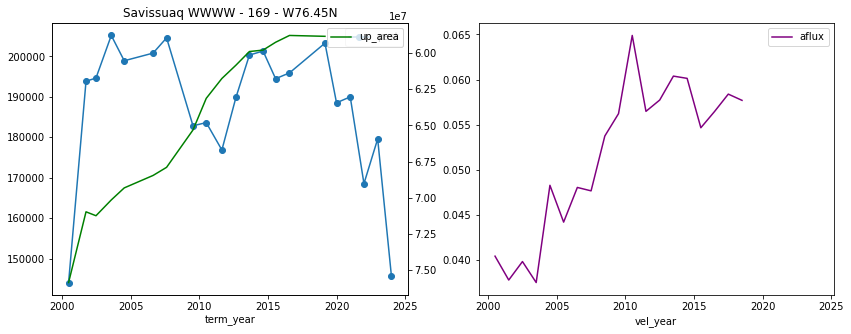

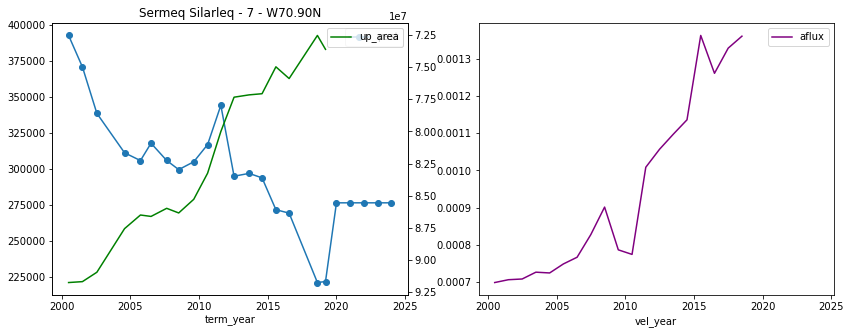

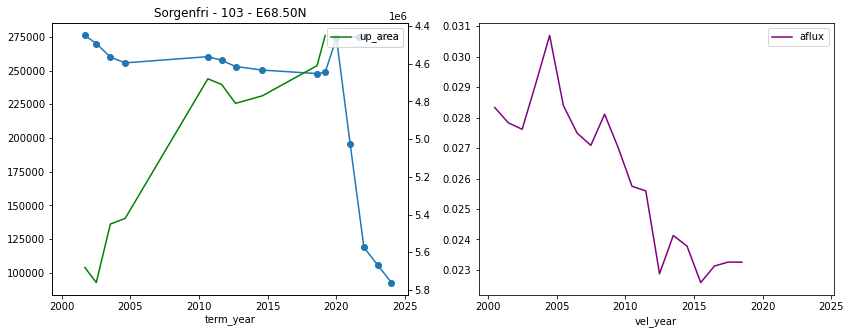

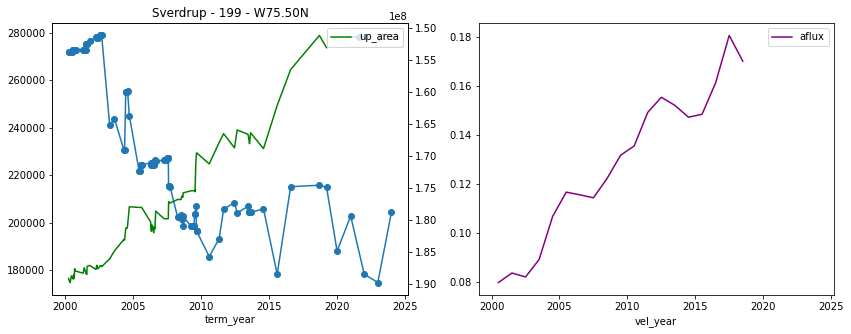

In [260]:
# Plotting from Sep 30, 2021
import scipy
%matplotlib inline

# Glaciers that have shown consistent retreat
retreat_ids = {220, 18, 82, 148, 181, 212, 37, 186, 15, 164, 168, 204, 1, 203, 10, 197, 20, 196, 195, 192, 68, 50, 48, 173, 172, 171, 170, 169, 7, 103, 199}

for nplots,(_,selrow) in enumerate(select.df.iterrows()):
    
    glacier_id = selrow['w21t_glacier_number']
    if glacier_id not in retreat_ids:
        continue
        
    fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(14,5))

    glacier_df0 = velterm_df[velterm_df.glacier_id == glacier_id]
#    glacier_df = glacier_df[glacier_df['future_index'].isna()]
    glacier_df = glacier_df0[glacier_df0.term_year < 2020]
    
    # Past velocities: look back
    df = glacier_df0[
        (glacier_df0['term_year'] > 2000) & (glacier_df0.term_year < 2025)]
    df = df[df.vel_year < df.term_year]
    df = df[['term_year', 'fluxratio']].groupby('term_year').mean()
    pastdf = df.rename(columns={'fluxratio':'past'})

    if len(pastdf) < 5:
        continue

    
#    # Integrate cumulative of past velocities (Pa year)
#    pastdf = pastdf.reset_index()
#    pdfint = scipy.integrate.cumtrapz(pastdf.past - pastdf.past.mean(), x=pastdf.term_year, initial=0)
#    pastdf['past_int'] = pdfint
#    pastdf = pastdf[['term_year', 'past_int']].set_index('term_year')

    # Future velocities: look forward
#    df = glacier_df[(glacier_df['vel_year'] > 2000) & \
#        (glacier_df['term_year'] > 2000) & (glacier_df.term_year < 2020)]
    df = glacier_df
    df = df[(df.term_year < 2020) & (df.vel_year < df.term_year) & (df.vel_year > df.term_year-6)]
    df = df[df.vel_year >= df.term_year]
    df = df[df.vel_year < 2020]
    df = df[['term_year', 'fluxratio']].groupby('term_year').mean()
    futdf = df.rename(columns={'fluxratio':'future'})

    plt.ioff()

    pastdf.plot(marker='o', ax=ax1)#,linestyle='none')
    futdf.plot(marker='o', ax=ax)#,linestyle='none')

    # https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/two_scales.html
    axr = ax1.twinx()
    # Plot cumulative retreat
    df = glacier_df.sort_values(['term_year']).drop_duplicates('term_year')[['term_year','up_area']]
    df = df[df.term_year > 2000]
#    print(df['term_year'])
    df.set_index('term_year').plot(ax=axr,color='g').invert_yaxis()
    
    
    # Plot flux by year
    df = glacier_df0
    df = df[(df.vel_year > 2000) & (df.vel_year < 2020) & (df.term_year == 2021)]
    df = df[['vel_year', 'aflux']]
#    df = df.sort_values(['vel_year']).drop_duplicates('vel_year')[['vel_year','aflux']]
#    print(df['vel_year'])
    df.set_index('vel_year').plot(ax=ax2,color='purple') 



#    # Plot Wood et al melt data
#    rdf = d_w21.glacier_rate_df(selrow['w21_data_fname'])
#    rdf = rdf.loc[(rdf.index > 2000)]
#    rdf = rdf[['ice_advection']]
#    rdf.plot(color='purple', ax=ax2)


    
#    # Plot Wood et al retreat rate data
#    # (but it's too choppy)
#    rdf = d_w21.glacier_rate_df(selrow['w21_data_fname'])
#    rdf = rdf[['calving']]
#    # Index is time, and we want to add .5
#    rdf.plot(ax=axr, color='g')


#    # Plot the smoothed derivative of the retreat
#    up_df = glacier_df.sort_values(['term_year']).drop_duplicates('term_year')[['term_year','up_area']]
#    if len(up_df) > 5:
#        #up_df = up_df.set_index('term_year')
#        spl = scipy.interpolate.UnivariateSpline(up_df['term_year'], up_df['up_area'], s=5e10)
#        xs = np.linspace(1986.,2019,200)
#        retreat_rate = spl.derivative()(xs)
#        retreat_df = pd.DataFrame({'term_year':xs, 'retreat_rate':retreat_rate})
#        retreat_df = retreat_df.set_index('term_year')
#    #    print(retreat_rate)
#    #    plt.plot(xs, retreat_rate, 'g', ax=axr)
#        retreat_df.plot(ax=axr,color='g')

#spl.set_smoothing_factor(.001)
#xs = np.linspace(1985,2020,200)
#xs = np.linspace(2009.5,2020,200)
#plt.plot(xs,spl.derivative()(xs), 'g')

 

    plt.title('{} - {} - {}'.format(selrow['w21t_Glacier'], glacier_id, selrow['ns481_grid']))

#    break
#    if nplots > 20:
#        break
    
plt.show()


In [51]:
df.sort_values(['term_year']).drop_duplicates('term_year')

,vel_year,future_index,term_year,terminus,aflux,sflux,ncells,up_area,fluxratio,glacier_id
0,1985.498516,NaN,1985.358790,None,0.010735,1265.203756,41,70410000.0,117855.517091,1
211,1992.499886,NaN,1985.665639,None,0.015330,2208.729844,49,69010000.0,144076.817066,1
272,1994.498516,NaN,1986.254795,None,0.017775,3031.700206,48,70020000.0,170564.356556,1
843,2013.498516,NaN,1986.717694,None,0.014594,2993.617794,41,69330000.0,205128.949848,1
814,2012.499886,NaN,1987.375228,None,0.000072,14.916564,41,69980000.0,207296.522425,1
425,1999.498516,NaN,1987.701256,None,0.014933,2856.062787,41,69050000.0,191261.457420,1
906,2015.498516,NaN,1988.294968,None,0.001783,364.513400,41,69830000.0,204413.687361,1
997,2018.498516,NaN,1988.688411,None,0.015441,3432.897161,47,68560000.0,222321.595835,1
308,1995.498516,NaN,1989.257420,None,0.016633,3166.134945,47,69060000.0,190357.548319,1
489,2001.498516,NaN,1989.739612,None,0.019018,3141.062418,47,68260000.0,165162.775217,1


In [52]:
select.df

,w21t_Glacier,w21t_date_termini,w21t_glacier_number,w21t_tloc,w21_popular_name,w21_greenlandic_name,w21_coast,w21_category,w21_Qr,w21_Qf,w21_Qm,w21_Qs,w21_Qc_inferred,w21_qm,w21_qf,w21_qc,w21_mean_depth,w21_min_depth,w21_quality_str,w21_area_grounded_1992_2017,w21_area_grounded_1992_1997,w21_area_grounded_1998_2007,w21_area_grounded_2008_2017,w21_mean_fjord_width,w21_length_grounded_1992_2017,w21_length_grounded_1992_1997,w21_length_grounded_1998_2007,w21_length_grounded_2008_2017,w21_ocean_model_sample_area,w21_mean_TF_1992-2017,w21_mean_TF_1992-1997,w21_mean_TF_1998-2007,w21_mean_TF_2008-2017,w21_subglacial_discharge_1992_2017,w21_subglacial_discharge_1992_1997,w21_subglacial_discharge_1998_2007,w21_subglacial_discharge_2008_2017,w21_mean_xsection_area,w21_mean_undercutting_1992_2017,w21_mean_undercutting_1992_1997,w21_mean_undercutting_1998_2007,w21_mean_undercutting_2008_2017,w21_mean_undercutting_uncertainty,w21_flux_basin_mouginot_2019,w21_mean_discharge,w21_mean_mass_balance,w21_reference_smb_1961_1990,w21_glacier_number,w21_data_fname,w21_key,w21_allnames,w21_tloc,fj_poly,fj_fid,ns481_key,ns481_grid,ns481_poly,up_key,up_fid,up_id,up_loc,cf20_key,cf20_glacier_id,cf20_greenlandic_name,cf20_official_name,cf20_alt_name,cf20_ref_name,cf20_fname,cf20_uniqename,cf20_locs,cf20_allnames,ns642_key,ns642_GlacierID,ns642_date_termini,ns642_points,ft_termini
0,AP Bernstorff,"[(1998-09-10 00:00:00, LINESTRING (167163 -288...",62,POINT (167083.2095130238 -2880159.637599094),A.P. Bernstorf Gl.,,SE,DW,5.21,10.97,1.80,0.00,14.38,0.52,7.23,6.71,219.0,146.0,Poor,19.26,0.00,16.73,2.53,3.70,5.21,0.00,4.52,0.69,SE5,2.68,1.97,3.05,2.66,2.05,1.72,2.06,2.19,1.02,0.71,0.49,0.81,0.72,60.77,AP_BERNSTOFF_GLETSCHER,5.8000,-1.4,4.6,62,AP Bernstorff Data.nc,"(A.P. Bernstorf Gl., AP_BERNSTOFF_GLETSCHER)","(A.P. Bernstorf Gl., )",POINT (167083.2095130238 -2880159.637599094),POLYGON ((166401.6768121918 -2884123.318789781...,118.0,E63.85N,E63.85N,"POLYGON ((129950 -2911150, 186050 -2911150, 18...",110,110,None,POINT (153628.1427368799 -2865125.393109926),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.0,190.0,"[((2000-09-30 00:00:00, 2001-01-23 00:00:00), ...","(POINT (169501.4416031677 -2880227.261221292),...",[(LINESTRING (167460.6395044228 -2875820.97230...
1,Academy,"[(2019-03-24 00:00:00, LINESTRING (195411 -887...",142,POINT (198779.5673076923 -884887.2740384615),Academy Gl.,,N,SR,2.52,0.34,NaN,0.62,NaN,NaN,0.67,NaN,191.0,67.0,Poor,20.80,6.25,12.70,1.85,8.24,2.52,0.76,1.54,0.22,N4,1.22,0.41,1.04,1.86,4.79,2.77,4.98,5.86,1.82,0.25,0.06,0.21,0.41,24.10,ACADEMY,0.7000,-0.7,0.6,142,Academy Data.nc,"(Academy Gl., ACADEMY)","(Academy Gl., )",POINT (198779.5673076923 -884887.2740384615),POLYGON ((189882.6804330644 -885953.4491530219...,99.0,E81.45N,E81.45N,"POLYGON ((171950 -940150, 238050 -940150, 2380...",89,89,None,POINT (213928.6362996982 -924978.852936564),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,104.0,"[((2000-09-30 00:00:00, 2001-01-23 00:00:00), ...","(POINT (194442.7478411514 -885531.9322733412),...",[(LINESTRING (203367.4321498066 -883396.621496...
2,Akullersuup,"[(1996-08-13 00:00:00, LINESTRING (-227024 -28...",21,POINT (-228294.5274356103 -2815253.924972004),Akullersuup Se.,Akullersuup Sermia,SW,SC,0.18,1.29,-1.34,0.00,NaN,1.48,2.91,NaN,43.0,13.0,Poor,0.58,-0.58,1.38,-0.22,3.30,0.18,-0.18,0.42,-0.07,SW1,5.53,6.09,5.66,5.03,2.20,1.52,2.24,2.50,0.15,1.34,1.48,1.38,1.21,56.28,AKULLERSUUP-QAMANAARSUUP,1.8000,-0.8,1.6,21,Akullersuup Data.nc,"(Akullersuup Se., AKULLERSUUP-QAMANAARSUUP)","(Akullersuup Se., Akullersuup Sermia)",POINT (-228294.5274356103 -2815253.924972004),POLYGON ((-234258.230375272 -2817227.115569516...,135.0,W64.25N,W64.25N,"POLYGON ((-244150 -2862150, -186050 -2862150, ...",129,129,None,POINT (-220677.8025332157 -2812225.97662551),Akullersuup Sermia,208.0,Akullersuup Sermia,Akullersuup Sermia,Akugdlerssup Sermia,Akullersuup Sermia,/Users/eafischer2/data_sets/velocities_data/ca...,Akullersuup Sermia,(POINT (-228197.1018140606 -281

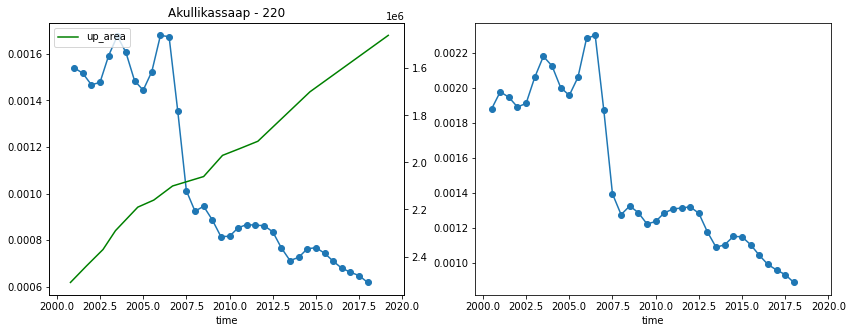

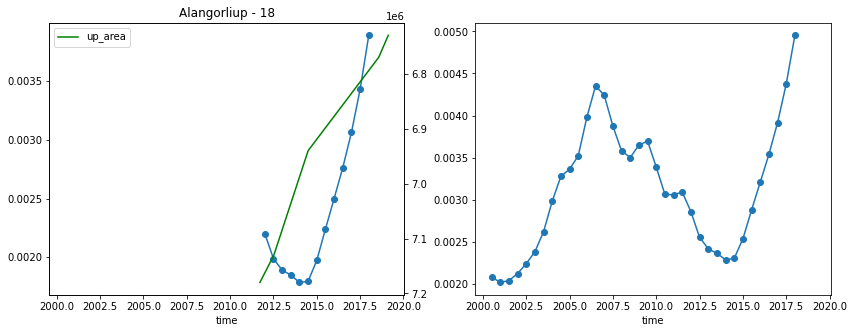

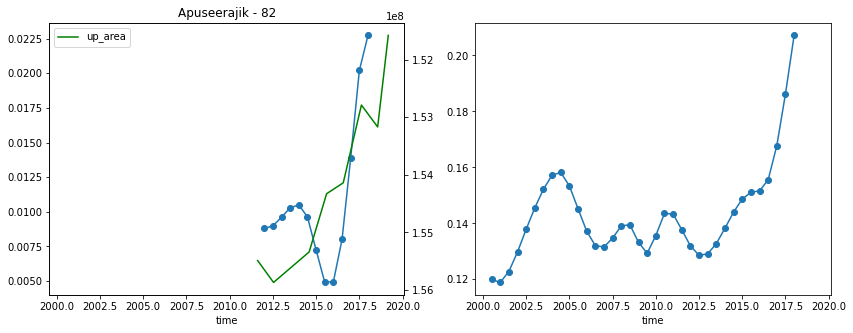

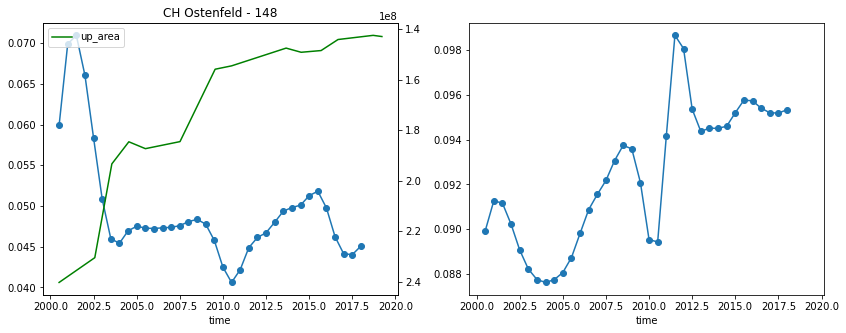

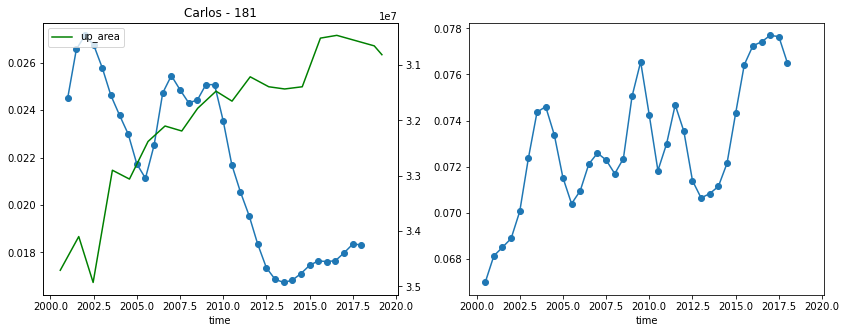

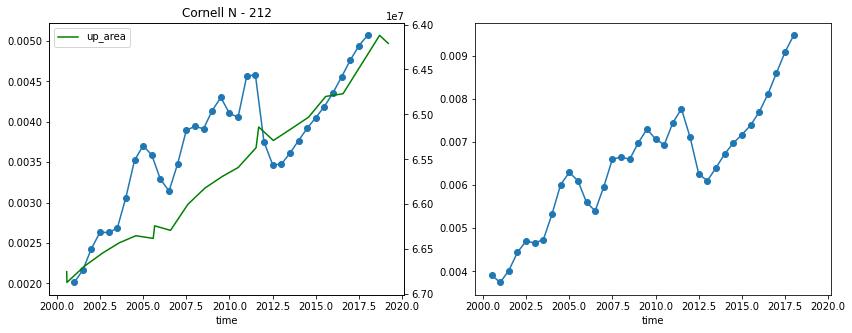

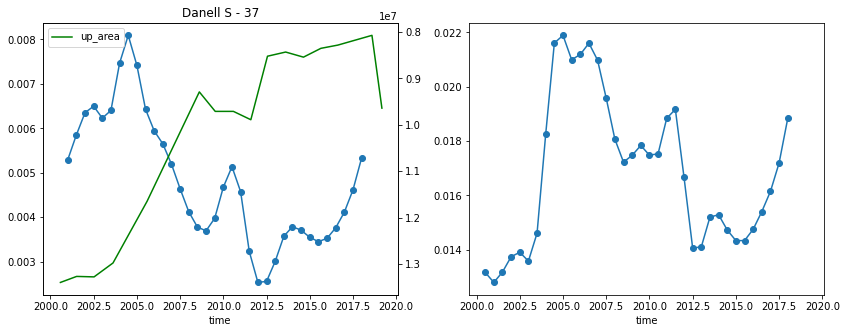

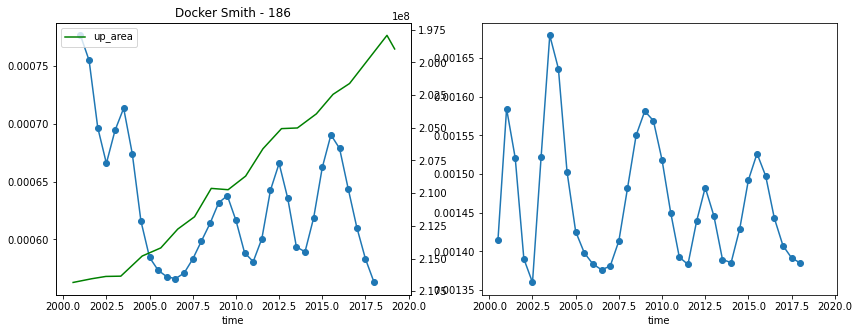

In [256]:
# Now let's try to explain Wood 2021 calving using our aflux * fluxratio[sigma] * sigma_max[=300000]
import scipy
%matplotlib inline

# Glaciers that have shown consistent retreat
retreat_ids = {220, 18, 82, 148, 181, 212, 37, 186, 15, 164, 168, 204, 1, 203, 10, 197, 20, 196, 195, 192, 68, 50, 48, 173, 172, 171, 170, 169, 7, 103, 199}

for nplots,(_,selrow) in enumerate(select.df.iterrows()):
    
    glacier_id = selrow['w21t_glacier_number']
    if glacier_id not in retreat_ids:
        continue
        
    fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(14,5))

    glacier_df0 = velterm_df[velterm_df.glacier_id == glacier_id]
#    glacier_df = glacier_df[glacier_df['future_index'].isna()]
    glacier_df = glacier_df0[glacier_df0.term_year < 2020]
    
    # Past velocities: look back
    df = glacier_df[
        (glacier_df['term_year'] > 2000) & (glacier_df.term_year < 2020)]
    df = df[df.vel_year < df.term_year]
    df = df[['term_year', 'fluxratio']].groupby('term_year').mean()
    df = df.rename(columns={'fluxratio':'past'}).reset_index()

    if len(pastdf) < 5:
        continue

    pastfn = scipy.interpolate.interp1d(df.term_year, df.past,
        kind='cubic', bounds_error=False, fill_value=np.nan)


    # aflux (glacier advection) by year
    df = glacier_df0
    df = df[(df.vel_year > 2000) & (df.vel_year < 2020) & (df.term_year == 2021)]
    df = df[['vel_year', 'aflux']]
#    df = df.sort_values(['vel_year']).drop_duplicates('vel_year')[['vel_year','aflux']]
#    print(df['vel_year'])
    afluxfn = scipy.interpolate.interp1d(df.vel_year, df.aflux,
        kind='cubic', bounds_error=False, fill_value=np.nan)

#    df.set_index('vel_year').plot(ax=ax2,color='purple') 

    # Interpolate to common points
    timepoints = np.linspace(2000, 2020, 41)
    alldf = pd.DataFrame(data={
        'time': timepoints, 'past': pastfn(timepoints), 'aflux':afluxfn(timepoints)})
    alldf = alldf.set_index('time')
    # advection * sigma / sigma_max
    alldf['adv_calv'] = alldf['aflux'] - (alldf['aflux'] * alldf['past'] * (1. / 300000.))
    plt.ioff()

    
    alldf['adv_calv'].plot(marker='o',ax=ax1)
    alldf['aflux'].plot(marker='o',ax=ax2)
    # https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/two_scales.html
    axr = ax1.twinx()
    # Plot cumulative retreat
    df = glacier_df.sort_values(['term_year']).drop_duplicates('term_year')[['term_year','up_area']]
    df = df[df.term_year > 2000]
    #print(df['term_year'])
    df.set_index('term_year').plot(ax=axr,color='g').invert_yaxis()
    



#    # Plot Wood et al melt data
#    rdf = d_w21.glacier_rate_df(selrow['w21_data_fname'])
#    rdf = rdf.loc[(rdf.index > 2000)]
#    rdf = rdf[['ice_advection']]
#    rdf.plot(color='purple', ax=ax2)


    
#    # Plot Wood et al retreat rate data
#    # (but it's too choppy)
#    rdf = d_w21.glacier_rate_df(selrow['w21_data_fname'])
#    rdf = rdf[['calving']]
#    # Index is time, and we want to add .5
#    rdf.plot(ax=axr, color='g')


#    # Plot the smoothed derivative of the retreat
#    up_df = glacier_df.sort_values(['term_year']).drop_duplicates('term_year')[['term_year','up_area']]
#    if len(up_df) > 5:
#        #up_df = up_df.set_index('term_year')
#        spl = scipy.interpolate.UnivariateSpline(up_df['term_year'], up_df['up_area'], s=5e10)
#        xs = np.linspace(1986.,2019,200)
#        retreat_rate = spl.derivative()(xs)
#        retreat_df = pd.DataFrame({'term_year':xs, 'retreat_rate':retreat_rate})
#        retreat_df = retreat_df.set_index('term_year')
#    #    print(retreat_rate)
#    #    plt.plot(xs, retreat_rate, 'g', ax=axr)
#        retreat_df.plot(ax=axr,color='g')

#spl.set_smoothing_factor(.001)
#xs = np.linspace(1985,2020,200)
#xs = np.linspace(2009.5,2020,200)
#plt.plot(xs,spl.derivative()(xs), 'g')

 

    plt.title('{} - {}'.format(selrow['w21t_Glacier'], glacier_id))

#    break
    if nplots > 20:
        break
    
plt.show()



In [1]:
# Now let's try to explain Wood 2021 calving using our aflux * fluxratio[sigma] * sigma_max[=300000]
import scipy
%matplotlib inline

# Glaciers that have shown consistent retreat
retreat_ids = {220, 18, 82, 148, 181, 212, 37, 186, 15, 164, 168, 204, 1, 203, 10, 197, 20, 196, 195, 192, 68, 50, 48, 173, 172, 171, 170, 169, 7, 103, 199}

for nplots,(_,selrow) in enumerate(select.df.iterrows()):
    
    glacier_id = selrow['w21t_glacier_number']
    if glacier_id not in retreat_ids:
        continue
        
    fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(14,5))

    glacier_df0 = velterm_df[velterm_df.glacier_id == glacier_id]
#    glacier_df = glacier_df[glacier_df['future_index'].isna()]
    glacier_df = glacier_df0[glacier_df0.term_year < 2020]
    
    # Past velocities: look back
    df = glacier_df[
        (glacier_df['term_year'] > 2000) & (glacier_df.term_year < 2020)]
    df = df[df.vel_year < df.term_year]
    df = df[['term_year', 'fluxratio']].groupby('term_year').mean()
    df = df.rename(columns={'fluxratio':'past'}).reset_index()

    if len(pastdf) < 5:
        continue

    pastfn = scipy.interpolate.interp1d(df.term_year, df.past,
        kind='cubic', bounds_error=False, fill_value=np.nan)


    # aflux (glacier advection) by year
    df = glacier_df0
    df = df[(df.vel_year > 2000) & (df.vel_year < 2020) & (df.term_year == 2021)]
    df = df[['vel_year', 'aflux']]
#    df = df.sort_values(['vel_year']).drop_duplicates('vel_year')[['vel_year','aflux']]
#    print(df['vel_year'])
    afluxfn = scipy.interpolate.interp1d(df.vel_year, df.aflux,
        kind='cubic', bounds_error=False, fill_value=np.nan)

#    df.set_index('vel_year').plot(ax=ax2,color='purple') 

    # Interpolate to common points
    timepoints = np.linspace(2000, 2020, 41)
    alldf = pd.DataFrame(data={
        'time': timepoints, 'past': pastfn(timepoints), 'aflux':afluxfn(timepoints)})
    alldf = alldf.set_index('time')
    # advection * sigma / sigma_max
    alldf['adv_calv'] = alldf['aflux'] - (alldf['aflux'] * alldf['past'] * (1. / 300000.))
    plt.ioff()

    
    alldf['adv_calv'].plot(marker='o',ax=ax1)
    alldf['aflux'].plot(marker='o',ax=ax2)
    # https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/two_scales.html
    axr = ax1.twinx()
    # Plot cumulative retreat
    df = glacier_df.sort_values(['term_year']).drop_duplicates('term_year')[['term_year','up_area']]
    df = df[df.term_year > 2000]
    #print(df['term_year'])
    df.set_index('term_year').plot(ax=axr,color='g').invert_yaxis()
    



#    # Plot Wood et al melt data
#    rdf = d_w21.glacier_rate_df(selrow['w21_data_fname'])
#    rdf = rdf.loc[(rdf.index > 2000)]
#    rdf = rdf[['ice_advection']]
#    rdf.plot(color='purple', ax=ax2)


    
#    # Plot Wood et al retreat rate data
#    # (but it's too choppy)
#    rdf = d_w21.glacier_rate_df(selrow['w21_data_fname'])
#    rdf = rdf[['calving']]
#    # Index is time, and we want to add .5
#    rdf.plot(ax=axr, color='g')


#    # Plot the smoothed derivative of the retreat
#    up_df = glacier_df.sort_values(['term_year']).drop_duplicates('term_year')[['term_year','up_area']]
#    if len(up_df) > 5:
#        #up_df = up_df.set_index('term_year')
#        spl = scipy.interpolate.UnivariateSpline(up_df['term_year'], up_df['up_area'], s=5e10)
#        xs = np.linspace(1986.,2019,200)
#        retreat_rate = spl.derivative()(xs)
#        retreat_df = pd.DataFrame({'term_year':xs, 'retreat_rate':retreat_rate})
#        retreat_df = retreat_df.set_index('term_year')
#    #    print(retreat_rate)
#    #    plt.plot(xs, retreat_rate, 'g', ax=axr)
#        retreat_df.plot(ax=axr,color='g')

#spl.set_smoothing_factor(.001)
#xs = np.linspace(1985,2020,200)
#xs = np.linspace(2009.5,2020,200)
#plt.plot(xs,spl.derivative()(xs), 'g')

 

    plt.title('{} - {}'.format(selrow['w21t_Glacier'], glacier_id))

#    break
    if nplots > 20:
        break
    
plt.show()




NameError: name 'select' is not defined